In [1]:
%matplotlib inline

In [2]:
from glob import glob
from kid_readout.measurement.io import nc
from kid_readout.measurement import temperature

In [3]:
nc_filenames = glob('/data/detectors/2016-05-03_*_scan_lo*.nc')
nc_filenames

['/data/detectors/2016-05-03_143028_scan_lo_2010.0_MHz.nc',
 '/data/detectors/2016-05-03_143224_scan_lo_2200.0_MHz.nc',
 '/data/detectors/2016-05-03_143419_scan_lo_2390.0_MHz.nc',
 '/data/detectors/2016-05-03_143613_scan_lo_2580.0_MHz.nc',
 '/data/detectors/2016-05-03_143808_scan_lo_2770.0_MHz.nc',
 '/data/detectors/2016-05-03_144003_scan_lo_2960.0_MHz.nc',
 '/data/detectors/2016-05-03_144157_scan_lo_3150.0_MHz.nc',
 '/data/detectors/2016-05-03_144351_scan_lo_3340.0_MHz.nc',
 '/data/detectors/2016-05-03_144546_scan_lo_3530.0_MHz.nc',
 '/data/detectors/2016-05-03_144739_scan_lo_3720.0_MHz.nc']

In [4]:
ncfs = [nc.NCFile(f, cache_s21_raw=True) for f in nc_filenames]

In [5]:
ncfs[1].measurement_names()

[u'SweepArray0']

In [6]:
swpas = [ncf.SweepArray0 for ncf in ncfs]

In [8]:
for swpa in swpas:
    temperature.add_temperature(swpa, cryostat='hpd')

In [9]:
swpas[0]._io.root_path

'/data/detectors/2016-05-03_143028_scan_lo_2010.0_MHz.nc'

In [10]:
swpas[0].num_channels

256

In [11]:
len(swpas[0].stream_arrays)

64

No NaNs:

In [12]:
for swpa in swpas:
    print(np.sum([np.isnan(sa.s21_raw).sum() for sa in swpa.stream_arrays]))

0
0
0
0
0
0
0
0
0
0


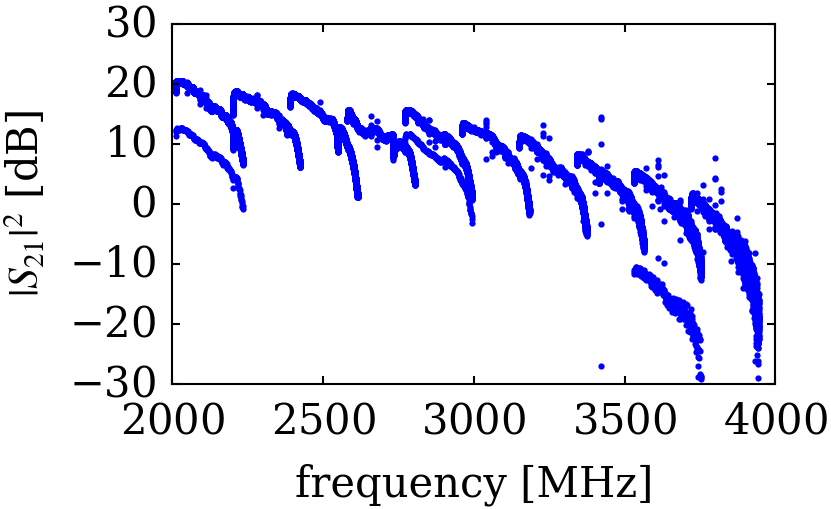

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel(r'$|S_{21}|^2$ [dB]')

for swpa in swpas:
    for sa in swpa.stream_arrays:
        ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_raw_mean)), '.b')

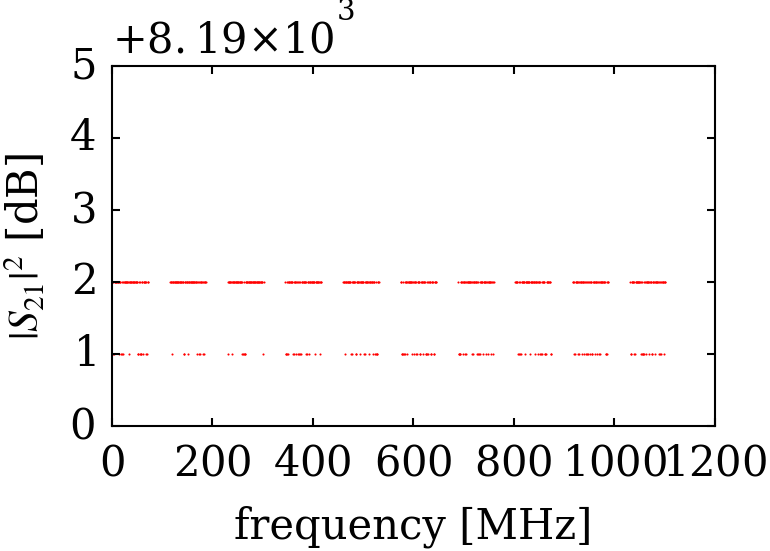

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel(r'$|S_{21}|^2$ [dB]')
ax.set_ylim(8190, 8195)

for swpa in swpas:
    for sa in swpa.stream_arrays:
        ax.plot(sa.epoch - swpas[0].start_epoch(), sa.s21_raw.shape[1], '.r', markersize=1)

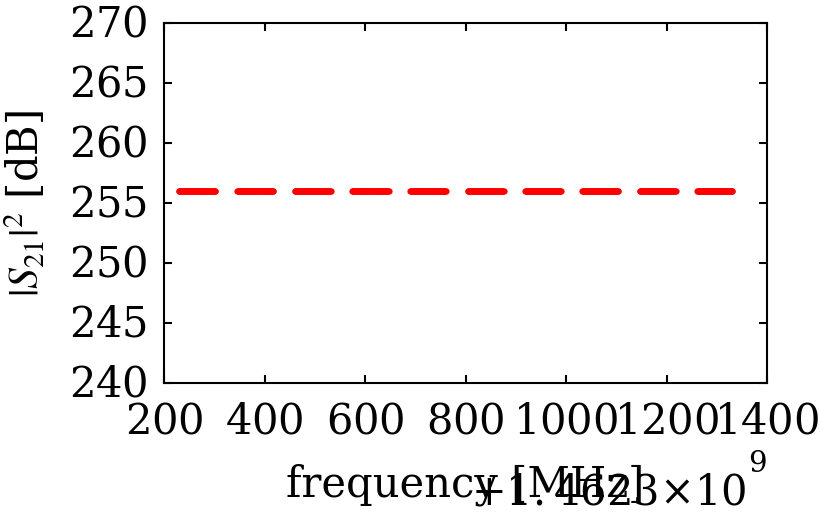

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel(r'$|S_{21}|^2$ [dB]')

for swpa in swpas:
    for sa in swpa.stream_arrays:
        ax.plot(sa.epoch, sa.s21_raw.shape[0], '.r')

# Investigate varying amplitude

In [17]:
swpa0 = swpas[0]

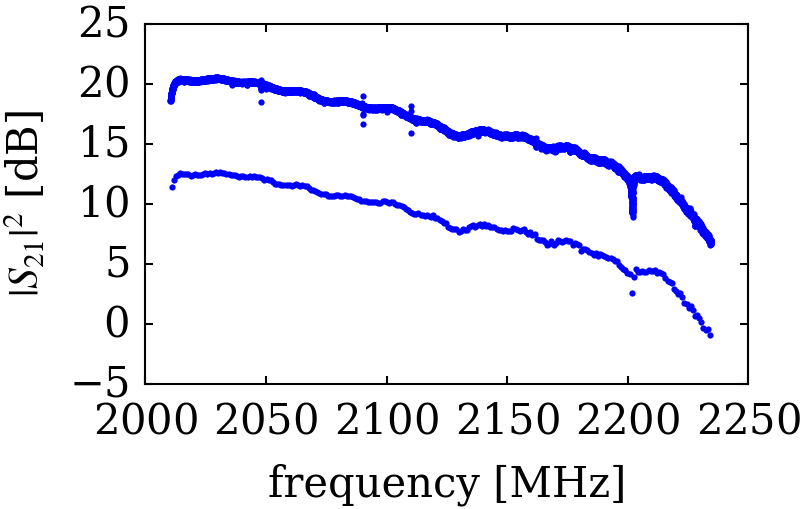

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel(r'$|S_{21}|^2$ [dB]')

for sa in swpa0.stream_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_raw_mean)), '.b')

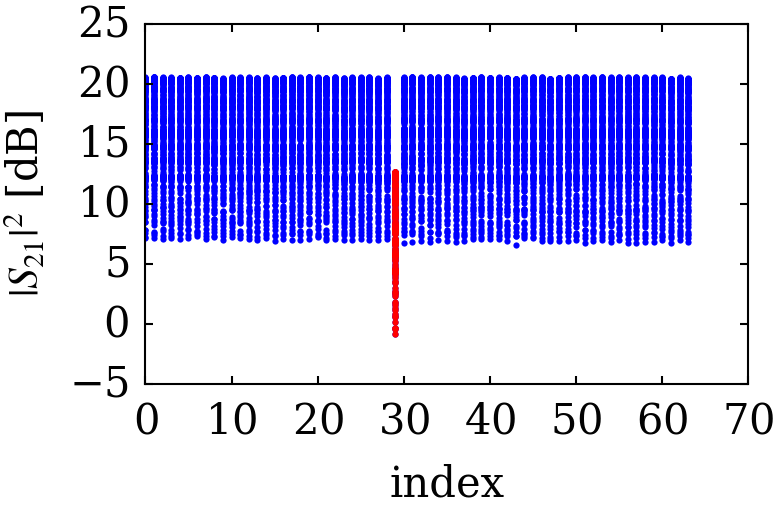

In [48]:
fig, ax = plt.subplots()
ax.set_xlabel('index')
ax.set_ylabel(r'$|S_{21}|^2$ [dB]')

for n, sa in enumerate(swpa0.stream_arrays):
    ax.plot(n * np.ones_like(sa.tone_index), 20 * np.log10(np.abs(sa.s21_raw_mean)), '.b')

bad_index = 29
bad_sa = swpa0.stream_arrays[bad_index]
ax.plot(bad_index * np.ones_like(bad_sa.tone_index), 20 * np.log10(np.abs(bad_sa.s21_raw_mean)), '.r')
fig.savefig('/home/flanigan/one_bad_stream_array.pdf')

In [32]:
ss.sample_time[-1]

0.26207999999999998

In [37]:
bad_sa.tone_bin.size

256

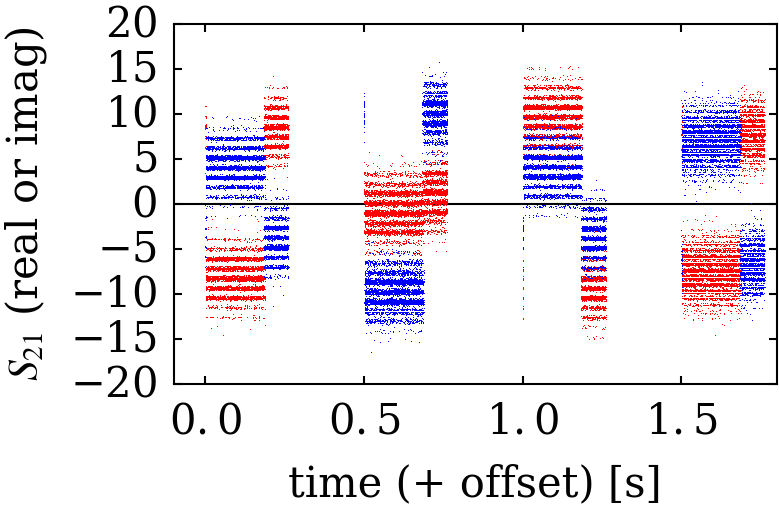

In [49]:
fig, ax = plt.subplots()
ax.axhline(0, color='k', linewidth=0.5)
ax.set_xlim(-0.1, 1.8)
ax.set_xlabel('time (+ offset) [s]')
ax.set_ylabel(r'$S_{21}$ (real or imag)')

for number in range(4):  #range(bad_sa.tone_bin.size):
    ss = bad_sa.stream(number)
    ax.plot(number / 2 + ss.sample_time, ss.s21_raw.real, ',r')
    ax.plot(number / 2 + ss.sample_time, ss.s21_raw.imag, ',b')

fig.savefig('/home/flanigan/bad_stream_array_four_streams.pdf')